# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# stdlib
import os
import shutil
import sqlite3

# 3rd party
import ipyparallel as ipp
import ipyvolume as ipv
import ipywidgets as ipw
import numpy as np
from scipy.optimize import minimize
import sympy as sp
import matplotlib.pyplot as plt

# local
import convergence as conv
import kelp_analyze
import kelp_compute
import mms
import discrete_plot
import run_utils as ru
#from fortran_wrappers.light_utils_wrap import light_utils_wrap as lu

## IPyParallel Setup

In [4]:
#remote_config = kelp_param.ParamSpanRemoteConfig()
ipc = ipp.Client()
lv = ipc.load_balanced_view()
dv = ipc.direct_view()
print(ipc.ids)

[0]


/home/oliver/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@oliver-arch')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [5]:
ipc.queue_status()

{'unassigned': 0, 0: {'queue': 0, 'completed': 80, 'tasks': 0}}

# Calculations

## Single Space

### Compute

In [12]:
from fortran_wrappers import pykelp3d_wrap as f90

In [13]:
f90.pykelp3d_wrap?

Call signature: f90.pykelp3d_wrap(*args, **kwargs)
Type:           fortran
String form:    <fortran object>
Docstring:     
gen_kelp(xmin,xmax,ymin,ymax,zmin,zmax,frond_lengths,frond_stds,num_fronds,water_speeds,water_angles,fs,fr,ft,p_kelp,[nx,ny,nz])

Wrapper for ``gen_kelp``.

Parameters
----------
xmin : input float
xmax : input float
ymin : input float
ymax : input float
zmin : input float
zmax : input float
frond_lengths : input rank-1 array('d') with bounds (nz)
frond_stds : input rank-1 array('d') with bounds (nz)
num_fronds : input rank-1 array('d') with bounds (nz)
water_speeds : input rank-1 array('d') with bounds (nz)
water_angles : input rank-1 array('d') with bounds (nz)
fs : input float
fr : input float
ft : input float
p_kelp : input rank-3 array('d') with bounds (nx,ny,nz)

Other Parameters
----------------
nx : input int, optional
    Default: shape(p_kelp,0)
ny : input int, optional
    Default: shape(p_kelp,1)
nz : input int, optional
    Default: len(frond_lengths)

In [50]:
print("hi")

hi


In [51]:
[f.done() for f in gs_fut]

[False, False, False, False]

In [57]:
print(gs_fut[0].stdout)

a_kelp = 1749.9999999999998
xmin = -5.0
xmax = 5.0
nx = 4
ymin = -5.0
ymax = 5.0
ny = 4
zmin = 0
zmax = 10
nz = 4
frond_lengths.shape = (4,)
frond_stds.shape = (4,)
num_fronds.shape = (4,)
water_speeds.shape = (4,)
water_angles.shape = (4,)
fs = 0.5
fr = 5.0
ft = 0.0004
p_kelp.shape = (4, 4, 4)



In [53]:
te = TypeError("whoops.")

In [87]:
# base_dir = os.path.join(os.environ['SCRATCH'], 'kelp-results')
base_dir = '/home/oliver/academic/research/kelp-results'

na = 8
ns_list = [4, 8, 16, 32]

study_name = 'verify_kelp_ss_sm_noscat_test_{}x{}'.format(max(ns_list), na)
study_dir = os.path.join(base_dir, study_name)

ntheta = na
nphi = na

# TODO: Don't actually delete results
#shutil.rmtree(os.path.join(base_dir, study_name), ignore_errors=True)

num_scatters = 0
fd_flag = False

a_water = 0.5
b = 0
kelp_dist = 'none'

combine_thread, gs_fut = kelp_compute.verify_kelp_single_space_compute_scalar_metrics(
    study_name, 
    a_water, b, ns_list, na, 
    kelp_dist, num_scatters, 
    fd_flag, lis_opts=None, num_threads=None,
    base_dir=base_dir
)

Creating new study directory.
Reading existing runs.
Finished reading existing runs.
Calling kelp_calculate_scalar_metrics(0.5, 0, 4, 4, 8, 'none', 0, False, study_dir='/home/oliver/academic/research/kelp-results/verify_kelp_ss_sm_noscat_test_32x8', study_name='verify_kelp_ss_sm_noscat_test_32x8', lis_opts='', num_threads=None)

Calling kelp_calculate_scalar_metrics(0.5, 0, 8, 8, 8, 'none', 0, False, study_dir='/home/oliver/academic/research/kelp-results/verify_kelp_ss_sm_noscat_test_32x8', study_name='verify_kelp_ss_sm_noscat_test_32x8', lis_opts='', num_threads=None)

Calling kelp_calculate_scalar_metrics(0.5, 0, 16, 16, 8, 'none', 0, False, study_dir='/home/oliver/academic/research/kelp-results/verify_kelp_ss_sm_noscat_test_32x8', study_name='verify_kelp_ss_sm_noscat_test_32x8', lis_opts='', num_threads=None)

Calling kelp_calculate_scalar_metrics(0.5, 0, 32, 32, 8, 'none', 0, False, study_dir='/home/oliver/academic/research/kelp-results/verify_kelp_ss_sm_noscat_test_32x8', study_na

/home/oliver/local/miniconda3/envs/kelp/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@oliver-arch')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


Opening combined db: /home/oliver/academic/research/kelp-results/verify_kelp_ss_sm_noscat_test_32x8/verify_kelp_ss_sm_noscat_test_32x8.db
Connected.
Combining /home/oliver/academic/research/kelp-results/verify_kelp_ss_sm_noscat_test_32x8/data/6v8gjk8z.db (tables: ['verify_kelp_ss_sm_noscat_test_32x8', 'sqlite_sequence'])
read.
Creating table verify_kelp_ss_sm_noscat_test_32x8
CREATING TABLE

    CREATE TABLE verify_kelp_ss_sm_noscat_test_32x8 (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        data_path CHAR(1024),
        absorptance_kelp REAL,
        a_water REAL,
        b INTEGER,
        ns INTEGER,
        na INTEGER,
        nx INTEGER,
        ny INTEGER,
        nz INTEGER,
        ntheta INTEGER,
        nphi INTEGER,
        nomega INTEGER,
        num_dens INTEGER,
        kelp_dist CHAR(1024),
        fs REAL,
        fr REAL,
        ft REAL,
        max_length REAL,
        length_std REAL,
        zmax INTEGER,
        rope_spacing INTEGER,
        I0 REAL,
       

### Plot

In [77]:
print(study_name)
db_path = os.path.join(study_dir, '{}.db'.format(study_name))
conn = sqlite3.Connection(db_path)

verify_kelp_ss_sm_noscat_test_32x8


err arr 0: [0.0064512  0.00776604 0.00935468 0.01127622 0.01360307 0.01642406
 0.01984803 0.02400817 0.02906678 0.03522038 0.04270439 0.05179657
 0.06281728 0.07612409 0.09209714 0.11111102 0.13348912 0.15943841
 0.18896771 0.22180129]
err arr 1: [0.00012668 0.0001807  0.00025718 0.00036509 0.00051676 0.00072894
 0.00102402 0.00143152 0.00198939 0.002745   0.00375492 0.00508237
 0.00679042 0.00892805 0.0115053  0.01445288 0.0175618  0.02040052
 0.02221207 0.02180226]
err arr 2: [6.65706456e-06 1.10981304e-05 1.87162157e-05 3.17666786e-05
 5.40891821e-05 9.22035032e-05 1.57145786e-04 2.67527878e-04
 4.54599439e-04 7.70555278e-04 1.30203531e-03 2.19180817e-03
 3.67312002e-03 6.12322227e-03 1.01451978e-02 1.66902796e-02
 2.72360799e-02 4.40389868e-02 7.04809266e-02 1.11531977e-01]
err arr 3: [4.40418115e-07 4.31932513e-07 4.52181476e-07 9.06342662e-07
 2.05671599e-06 4.52753454e-06 9.65530176e-06 2.01900754e-05
 4.17445173e-05 8.57240303e-05 1.75215266e-04 3.56753102e-04
 7.23680418e-04 1

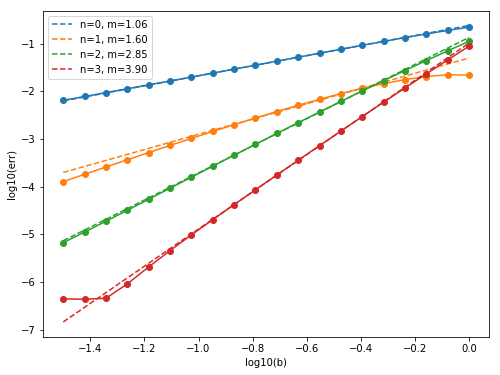

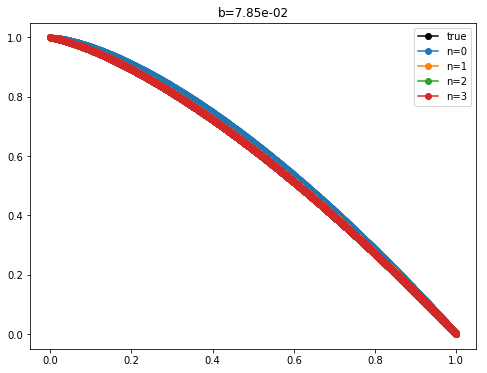

In [88]:
#norm = lambda x: np.linalg.norm(np.ravel(x), ord=2)
#norm = lambda x: np.sqrt(np.sum(x)**2/np.size(x))
norm = lambda x: np.mean(np.abs(x))

b_list, num_scatters_list = kelp_analyze.get_unique_vals(conn, study_name, ['b', 'num_scatters'])

plt.figure(figsize=[8,6])

true_rad_list = []
asym_rad_list = []
i_plot = 5
for num_scatters in num_scatters_list:
    err_list = []
    for i, b in enumerate(b_list):
        results_list = kelp_analyze.query_results(
            conn, study_name,
            b=b,
            num_scatters=num_scatters,
        )
        
        rad = results_list[0]['rad'][:]
        true_rad = results_list[0]['true_rad'][:]

        err = norm(rad - true_rad)
        err_list.append(err)
        
        if i == i_plot:
            asym_rad_list.append(rad)
            true_rad_list.append(true_rad)

    b_arr = np.array(b_list)[:]
    err_arr = np.array(err_list)[:]
    
    print("err arr {}: {}".format(num_scatters, err_arr))
    conv.plot_lin_fit(
        np.log10(b_arr), np.log10(err_arr), 
        min(-1+0*np.log(b_arr)), -.25+0*max(np.log(b_arr)), 
        xlabel='log10(b)', ylabel='log10(err)',
        label='n=%d, m={m:.2f}' % num_scatters
    )
plt.title('')
plt.legend()

plt.figure(figsize=(8,6))
grid = mms.gen_grid(ns, nz, ntheta, nphi, rope_spacing, zmax)
plot_inds = np.zeros_like(grid[2], dtype=bool)
plot_inds[0,0,:,0] = True
z = grid[2][plot_inds]
plt.plot(z, true_rad_list[0][plot_inds], 'ko-', label='true')
for n in num_scatters_list:
    plt.plot(z, asym_rad_list[n][plot_inds], 'C{}o-'.format(n), label='n={}'.format(n))

plt.title('b={:.2e}'.format(b_list[i_plot]))
plt.legend()